<a href="https://colab.research.google.com/github/imanmohamad10/Analysis-Mental-Health-Using-Machine-Learning/blob/main/Analysis_Mental_Fitness_FYP_byIman_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load datasets

In [ ]:
df1 = pd.read_csv("prevalence-by-mental-and-substance-use-disorder.csv")
df2 = pd.read_csv("mental-and-substance-use-as-share-of-disease.csv")

In [ ]:
df1.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [ ]:
df2.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


# Merge datasets

In [ ]:
data = pd.merge(df1, df2)
data.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


# Data Preprocessing

In [ ]:
data.isnull().sum()

,0
Entity,0
Code,690
Year,0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),0


In [ ]:
data.drop('Code',axis=1,inplace=True)

In [ ]:
data.head()

,Entity,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


In [ ]:
data.size,data.shape

(68400, (6840, 10))

In [ ]:
data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns')
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data.columns

# Rename columns in the DataFrame
data = data.rename(columns={
    'Entity': 'Country',
    'Year': 'Year',
    'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)': 'Schizophrenia',
    'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)': 'Bipolar_disorder',
    'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)': 'Eating_disorder',
    'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)': 'Anxiety',
    'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)': 'Drug_usage',
    'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)': 'Depression',
    'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)': 'Alcohol',
    'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)': 'Mental_fitness'
})

data.columns

Index(['Country', 'Year', 'Schizophrenia', 'Bipolar_disorder',
       'Eating_disorder', 'Anxiety', 'Drug_usage', 'Depression', 'Alcohol',
       'Mental_fitness'],
      dtype='object')

In [ ]:
southeast_asian_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia',
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam'
]

data = data[data['Country'].isin(southeast_asian_countries)]

# Display the filtered dataset
print("Filtered dataset with Southeast Asian countries:")
data.head()

Filtered dataset with Southeast Asian countries:


,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
810,Brunei,1990,0.326822,0.624113,0.473302,3.028683,0.881231,1.701147,1.023002,5.176148
811,Brunei,1991,0.327218,0.624707,0.469201,3.034194,0.881121,1.686907,1.012354,5.247895
812,Brunei,1992,0.327466,0.625318,0.465697,3.040504,0.879943,1.675388,1.002128,5.345016
813,Brunei,1993,0.327573,0.625979,0.462812,3.047317,0.878088,1.666598,0.992623,5.451285
814,Brunei,1994,0.327532,0.626602,0.460417,3.053681,0.877361,1.659791,0.984393,5.592965


In [ ]:
data.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
810,Brunei,1990,0.326822,0.624113,0.473302,3.028683,0.881231,1.701147,1.023002,5.176148
811,Brunei,1991,0.327218,0.624707,0.469201,3.034194,0.881121,1.686907,1.012354,5.247895
812,Brunei,1992,0.327466,0.625318,0.465697,3.040504,0.879943,1.675388,1.002128,5.345016
813,Brunei,1993,0.327573,0.625979,0.462812,3.047317,0.878088,1.666598,0.992623,5.451285
814,Brunei,1994,0.327532,0.626602,0.460417,3.053681,0.877361,1.659791,0.984393,5.592965


# Exploratory Data Analysis (EDA)

In [ ]:
# Display summary statistics
print("Summary Statistics:")
print(data.describe(), "\n")

Summary Statistics:
              Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
count   300.000000     300.000000        300.000000       300.000000   
mean   2004.500000       0.302747          0.413658         0.162291   
std       8.669903       0.025727          0.152757         0.141909   
min    1990.000000       0.259024          0.320858         0.057013   
25%    1997.000000       0.280441          0.333251         0.077923   
50%    2004.500000       0.301359          0.344309         0.094891   
75%    2012.000000       0.325895          0.356281         0.137086   
max    2019.000000       0.350919          0.795188         0.497599   

          Anxiety  Drug_usage  Depression     Alcohol  Mental_fitness  
count  300.000000  300.000000  300.000000  300.000000      300.000000  
mean     3.769114    0.615250    2.696116    0.821990        4.580344  
std      0.803292    0.163456    0.520820    0.219581        1.983915  
min      2.063867    0.419070    1.640902  

## Distribution of each numeric column

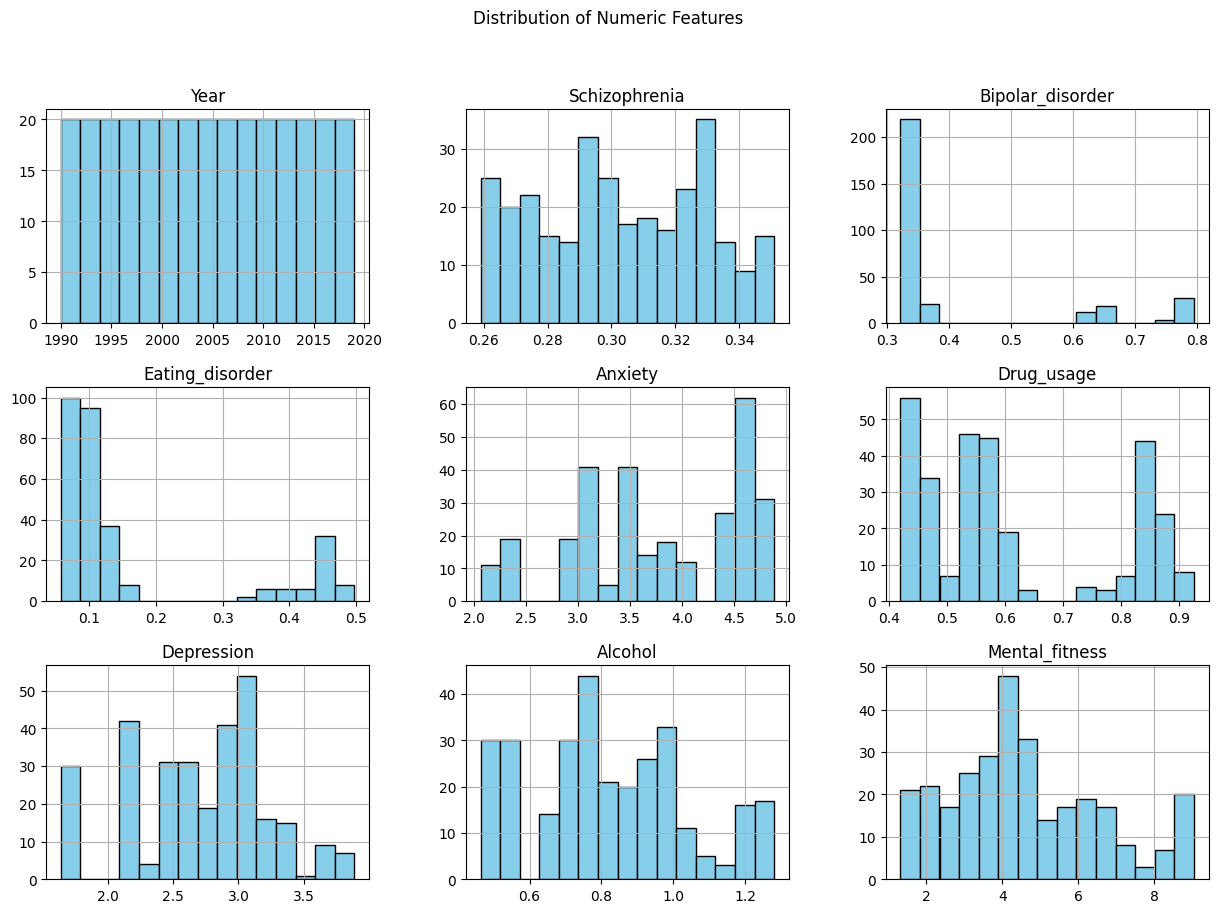

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols].hist(figsize=(15, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features")
plt.show()

## Pairplot for visualizing relationships

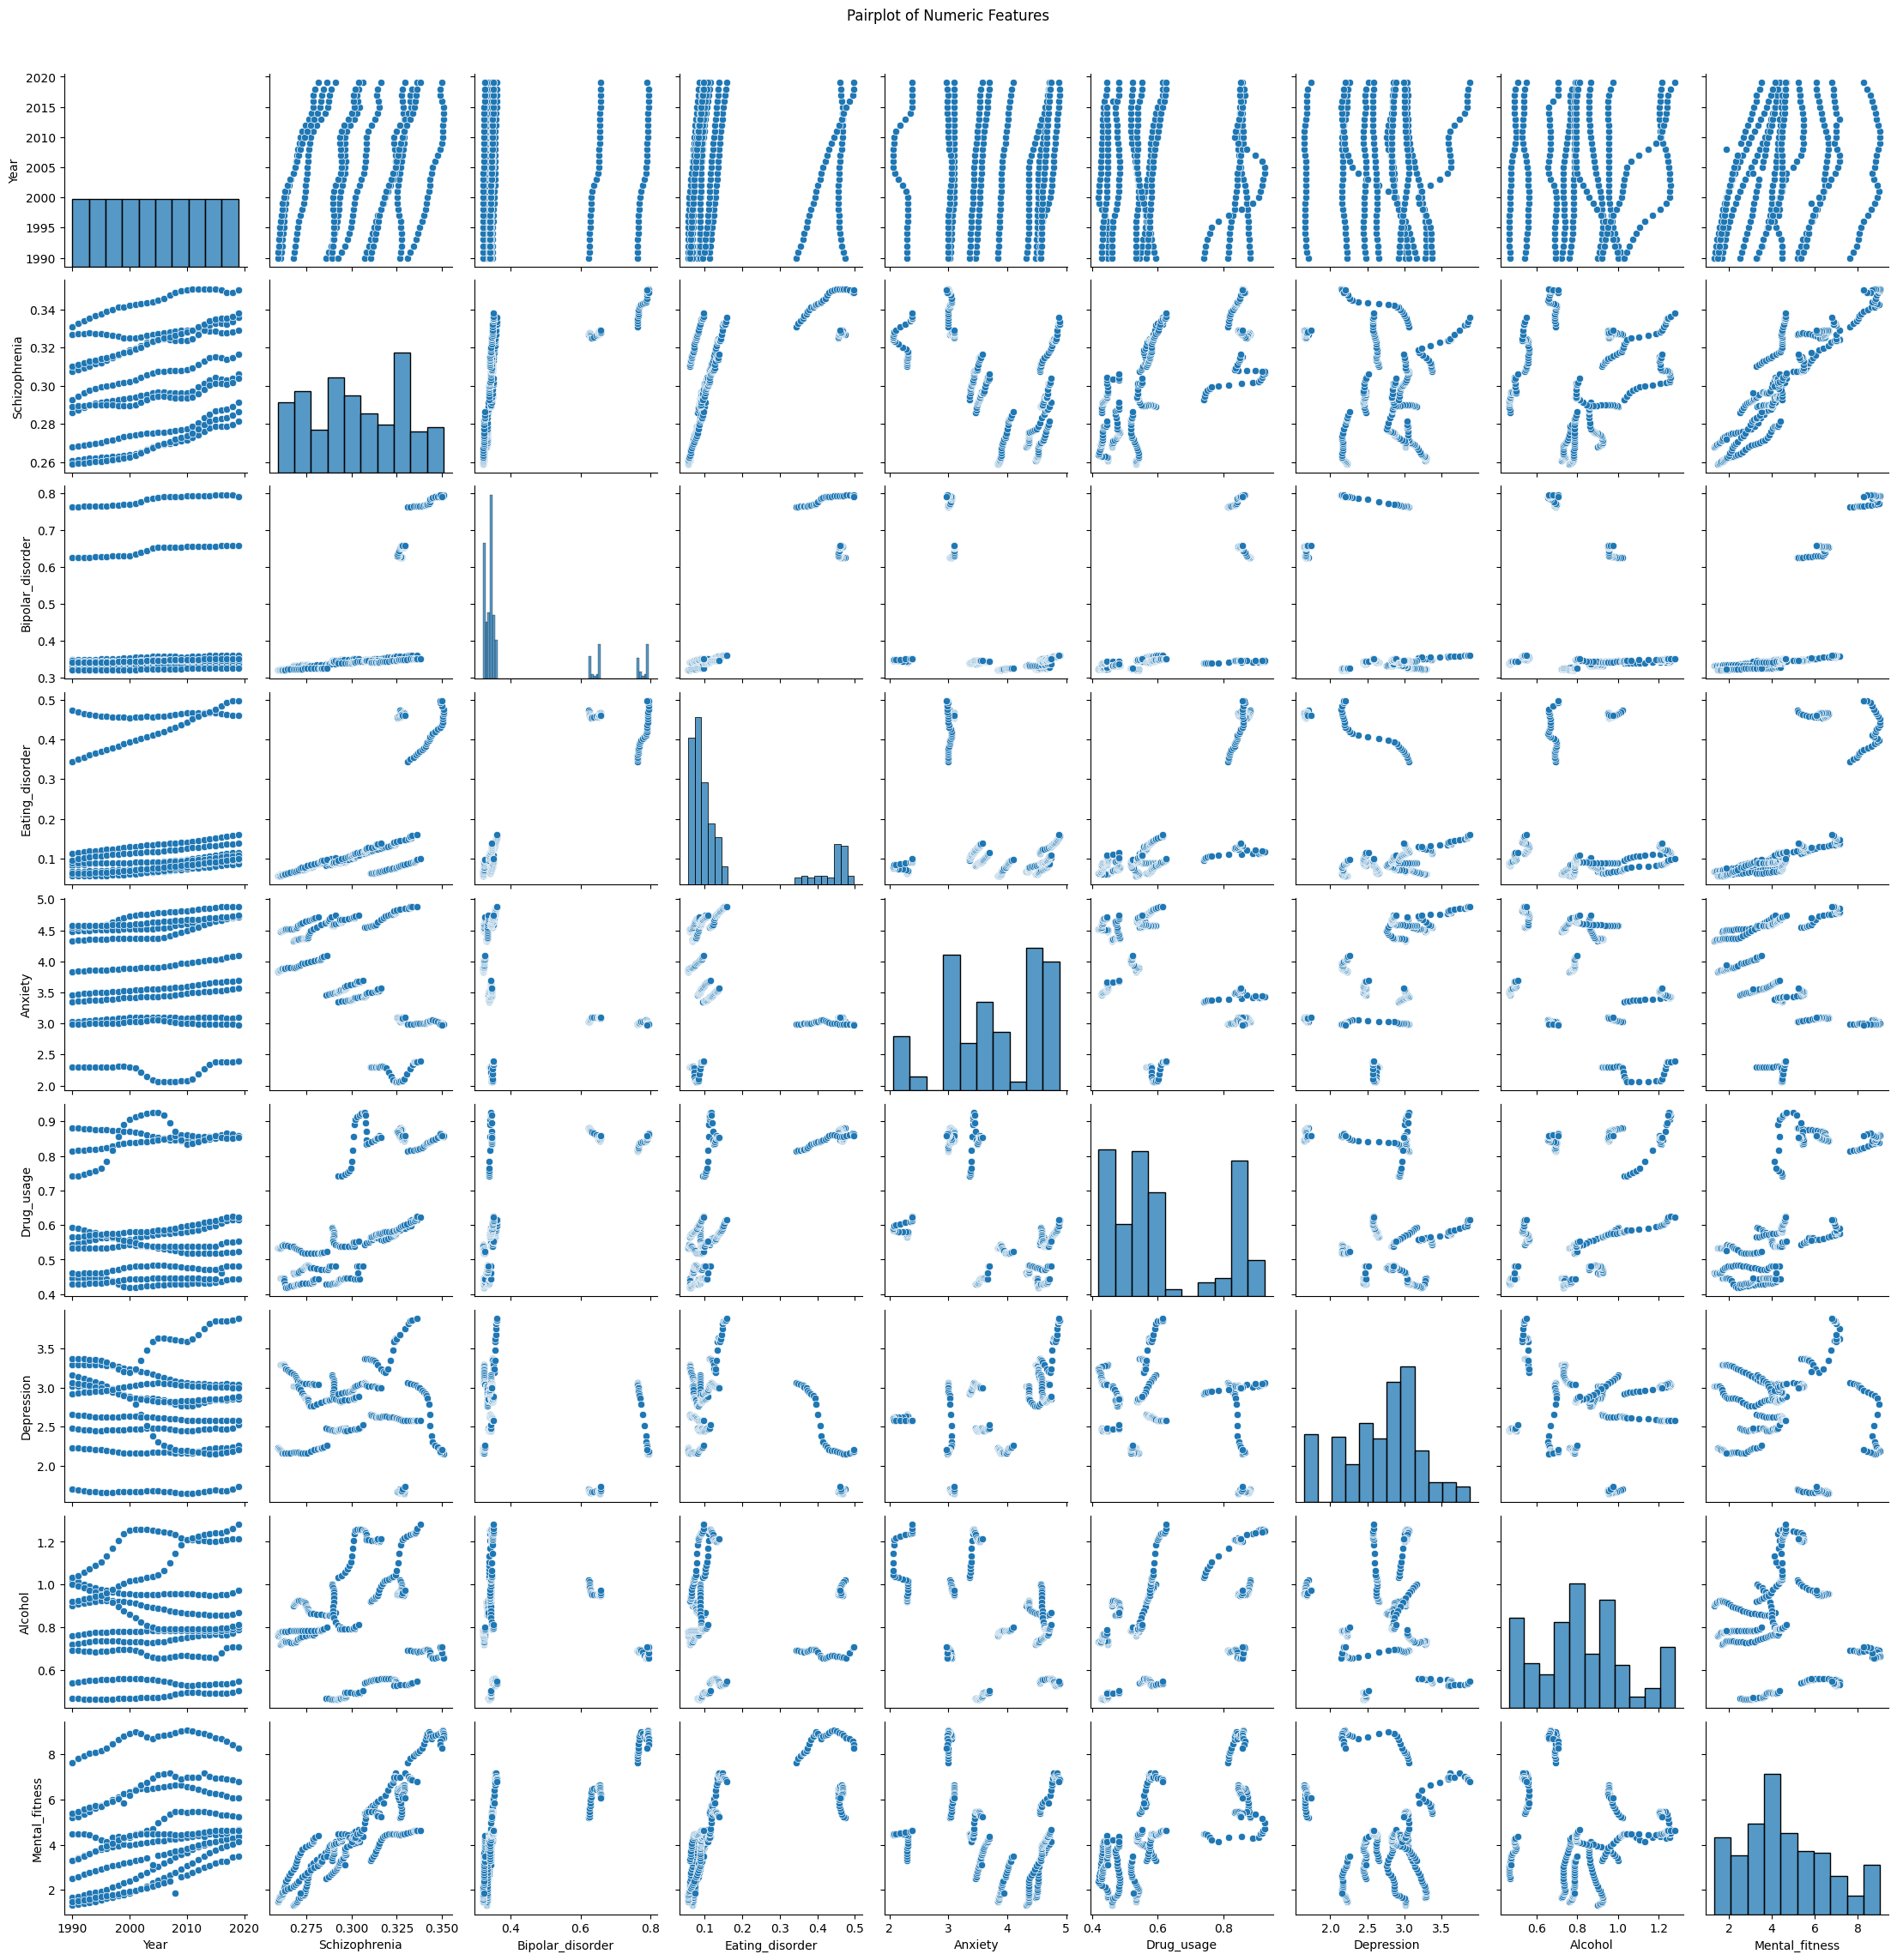

In [ ]:
sns.pairplot(data[numeric_cols])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

## Boxplots for detecting outliers

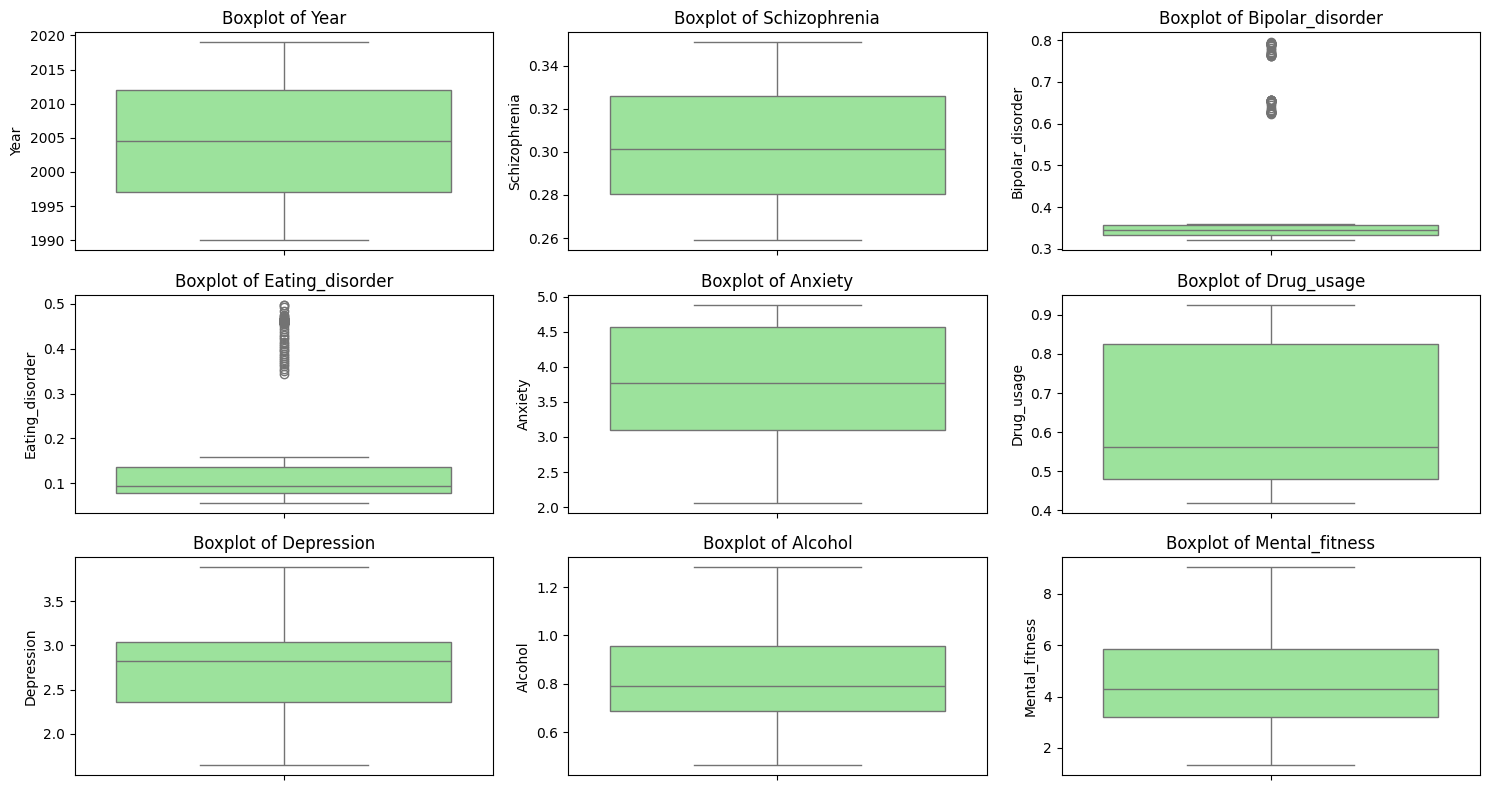

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## Trend analysis over years

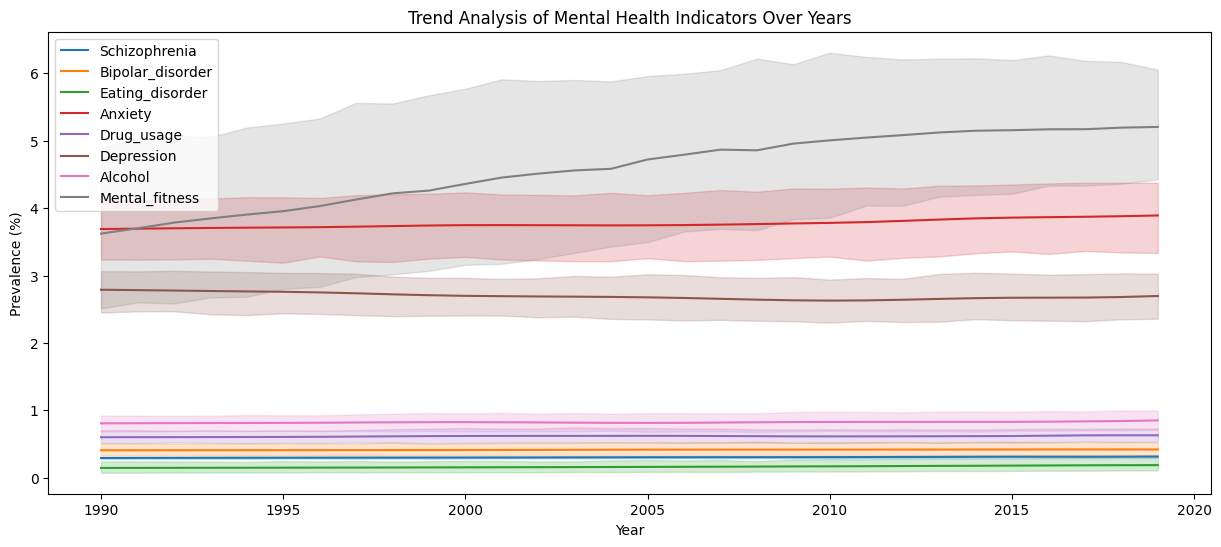

In [ ]:
plt.figure(figsize=(15, 6))
for col in numeric_cols:
    if col != "Year":
        sns.lineplot(data=data, x="Year", y=col, label=col)
plt.title("Trend Analysis of Mental Health Indicators Over Years in Southeast Asia Countries")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.legend()
plt.show()

## Country-wise mean statistics


In [ ]:
country_stats = data.groupby('Country')[numeric_cols].mean().sort_values(by='Schizophrenia', ascending=False)
print("Country-wise Statistics:")
print(country_stats.head())

Country-wise Statistics:
             Year  Schizophrenia  Bipolar_disorder  Eating_disorder   Anxiety  \
Country                                                                         
Singapore  2004.5       0.344118          0.780266         0.418134  3.006979   
Brunei     2004.5       0.327479          0.642869         0.461840  3.084145   
Vietnam    2004.5       0.323428          0.345853         0.077657  2.243301   
Malaysia   2004.5       0.321661          0.354893         0.135528  4.742563   
Thailand   2004.5       0.305756          0.343222         0.118688  3.447528   

           Drug_usage  Depression   Alcohol  Mental_fitness  
Country                                                      
Singapore    0.843571    2.534068  0.680171        8.590020  
Brunei       0.861506    1.669532  0.965693        6.155745  
Vietnam      0.590114    2.608044  1.087915        4.270371  
Malaysia     0.574931    3.531575  0.546394        6.490689  
Thailand     0.845940    3.002592  

## Top 10 countries with highest mean prevalence of Schizophrenia

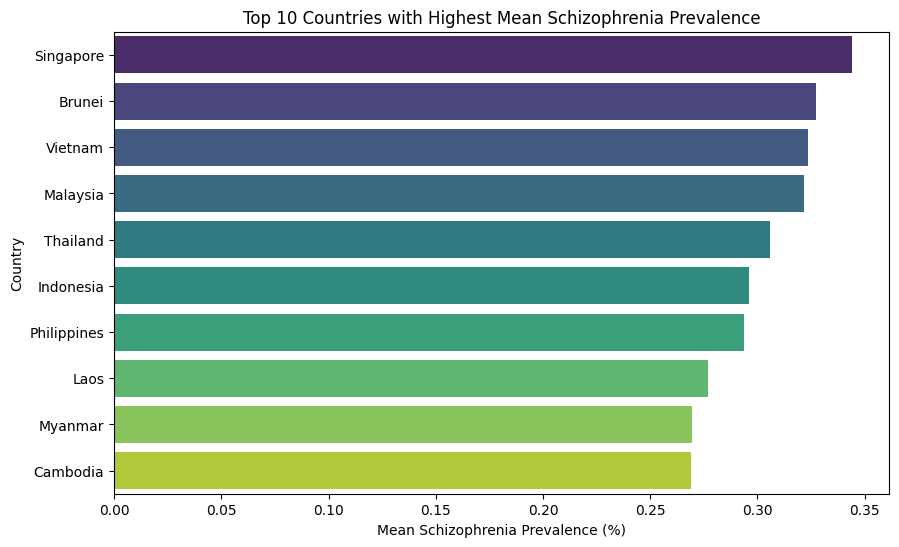

In [ ]:
top_10_countries = country_stats['Schizophrenia'].head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title("Top 10 Countries with Highest Mean Schizophrenia Prevalence")
plt.xlabel("Mean Schizophrenia Prevalence (%)")
plt.ylabel("Country")
plt.show()

## Correlation Matrix

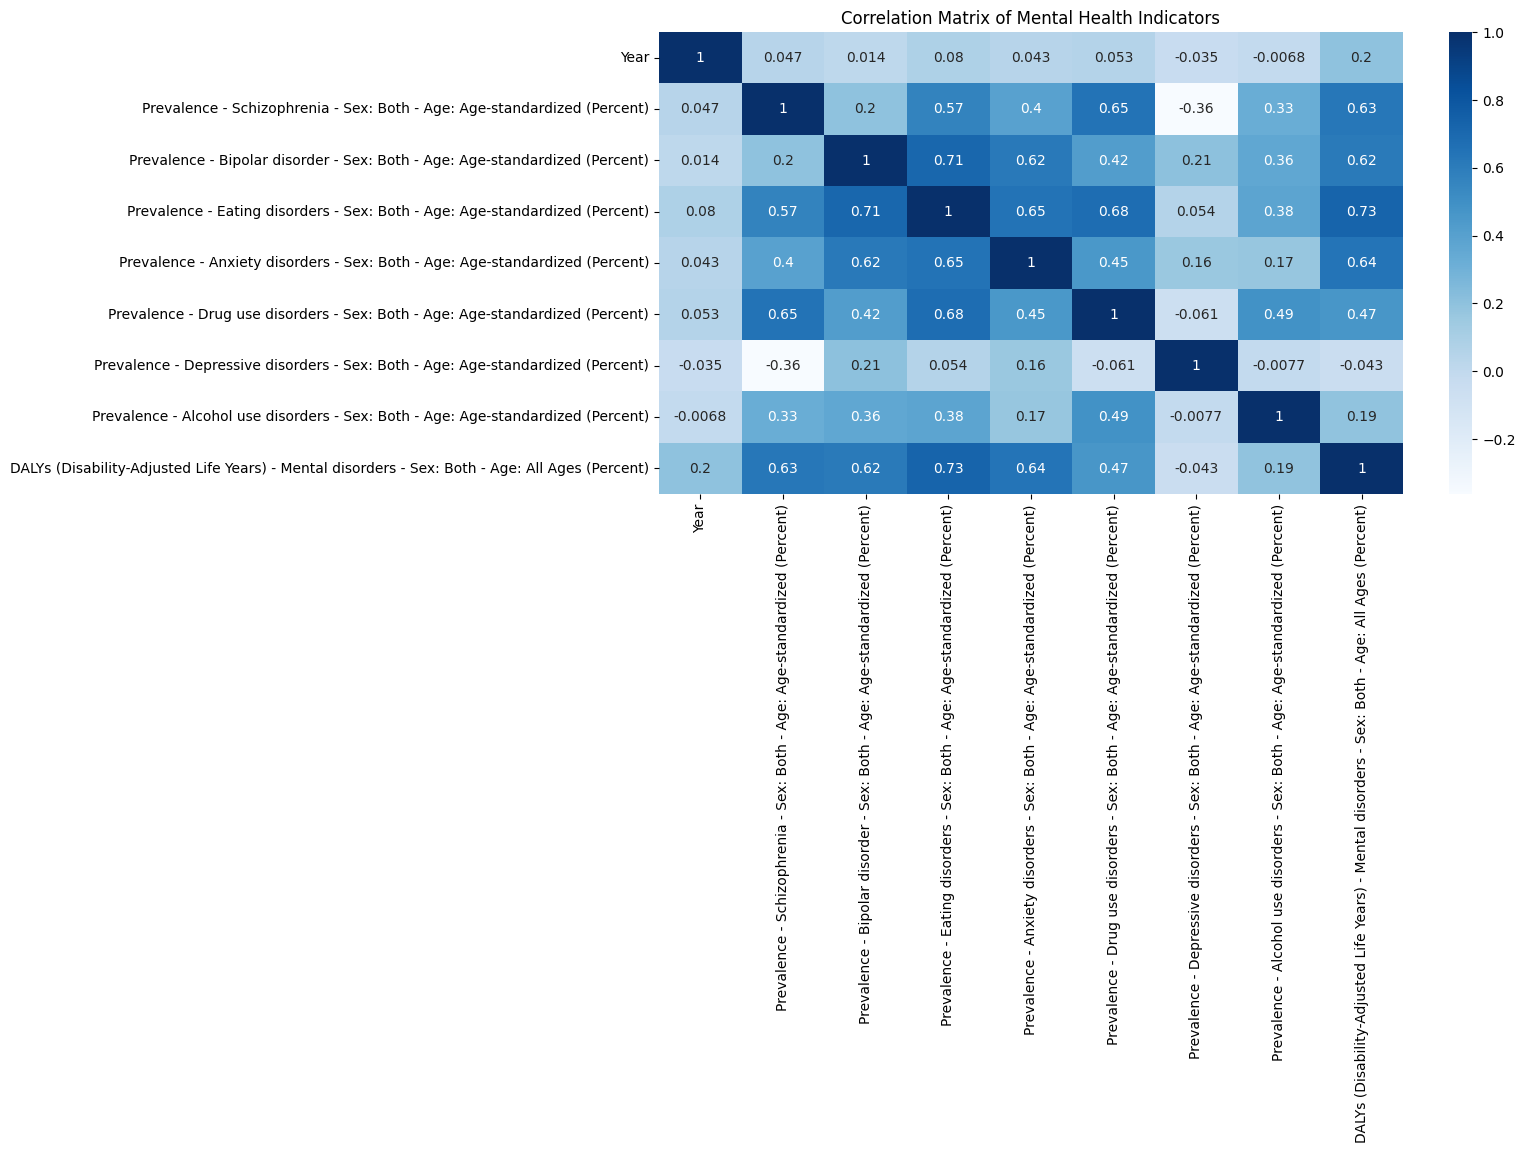

In [ ]:
correlation_matrix = data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Mental Health Indicators')
plt.show()

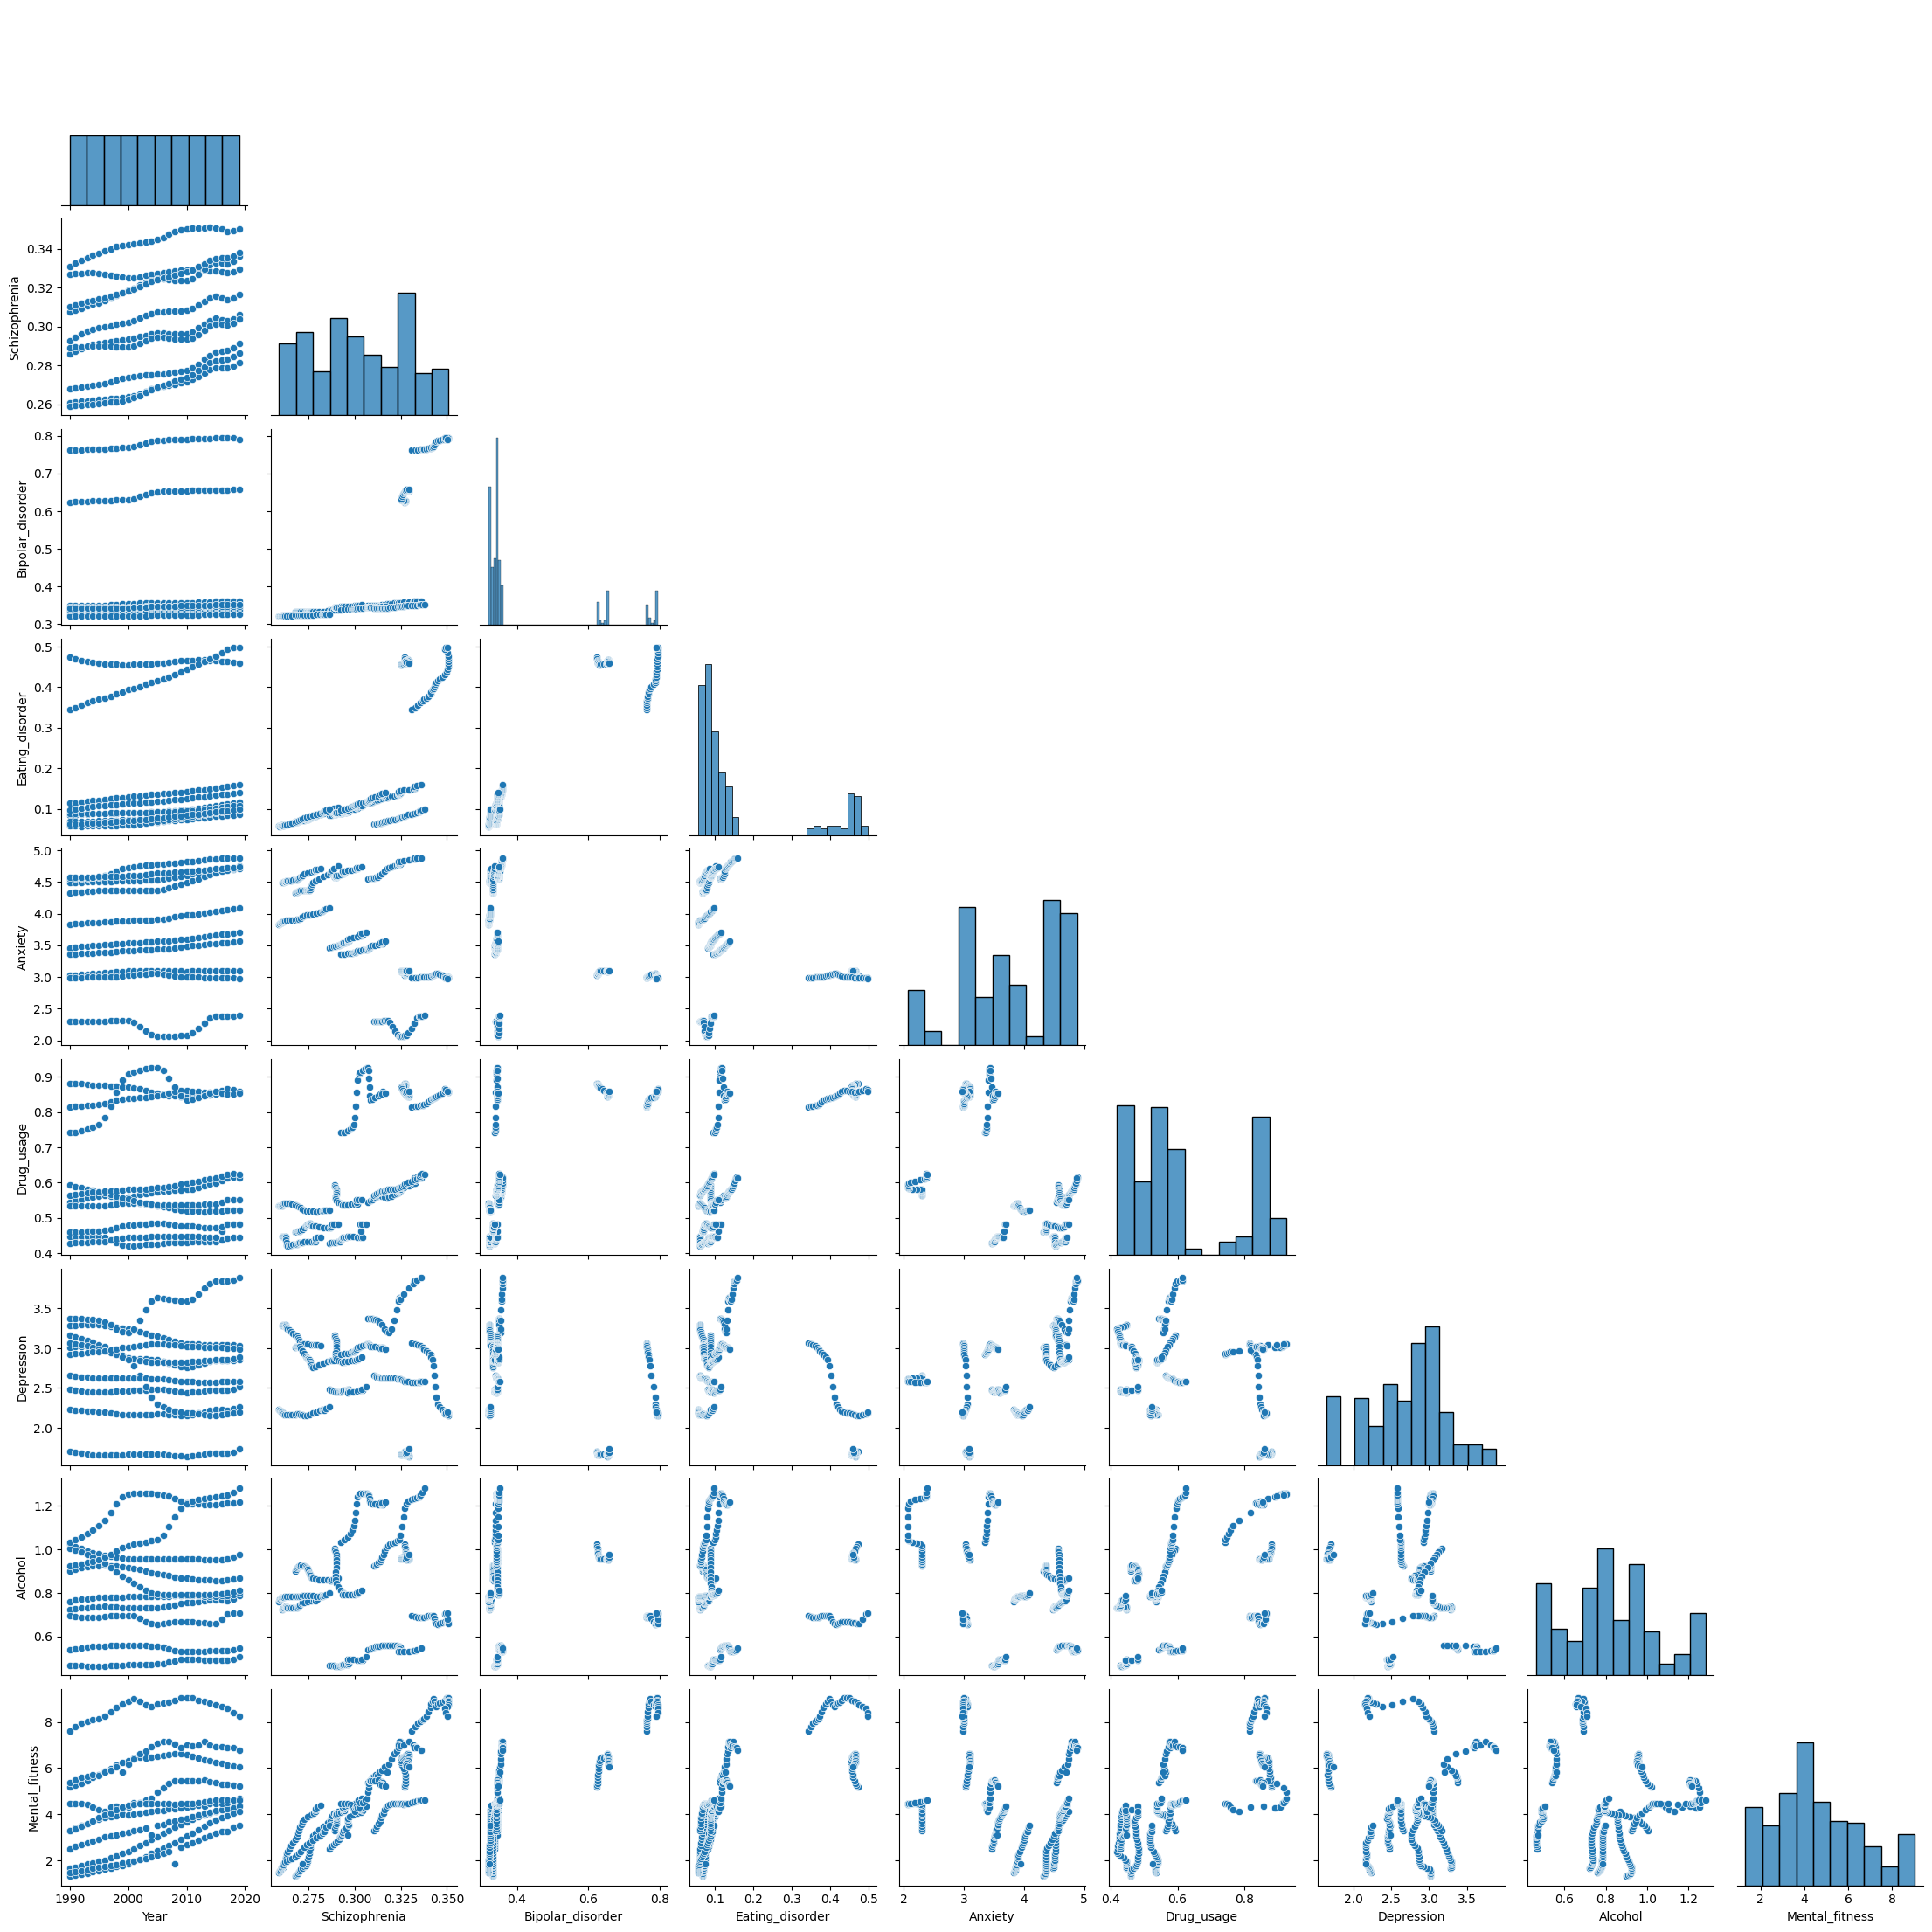

In [ ]:
sns.pairplot(data,corner=True)
plt.show()

In [ ]:
mean = data['Mental_fitness'].mean()
mean

4.580343539021349

In [ ]:
fig = px.pie(data, values='Mental_fitness', names='Year')
fig.show()

In [ ]:
fig=px.bar(data.head(10),x='Year',y='Mental_fitness',color='Year',template='ggplot2')
fig.show()

## Yearwise Variation in Mental Fitness of Different Countries in Southeast Asia

In [ ]:
fig = px.line(data, x="Year", y="Mental_fitness", color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

## Historical Mental Fitness Trend

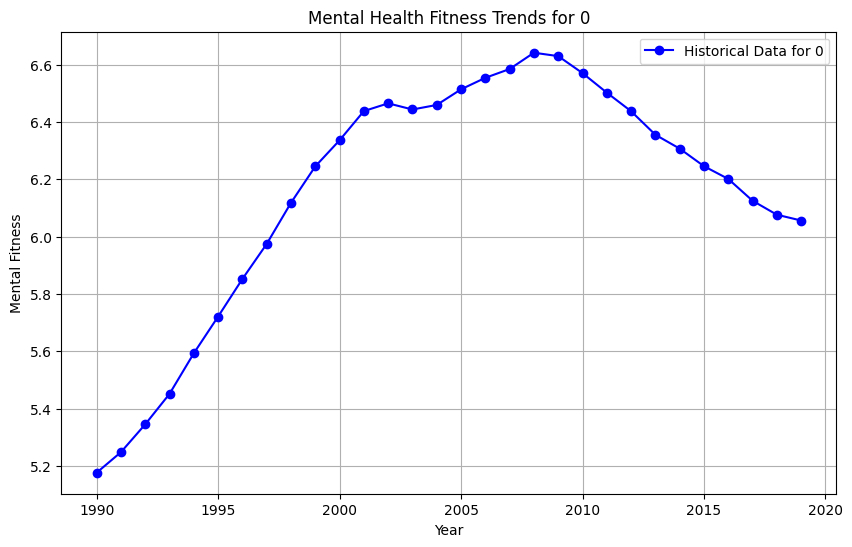

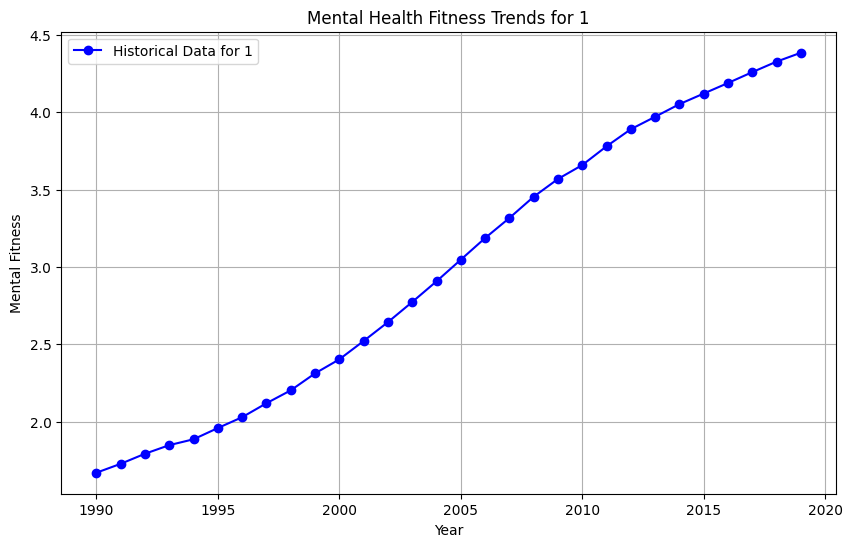

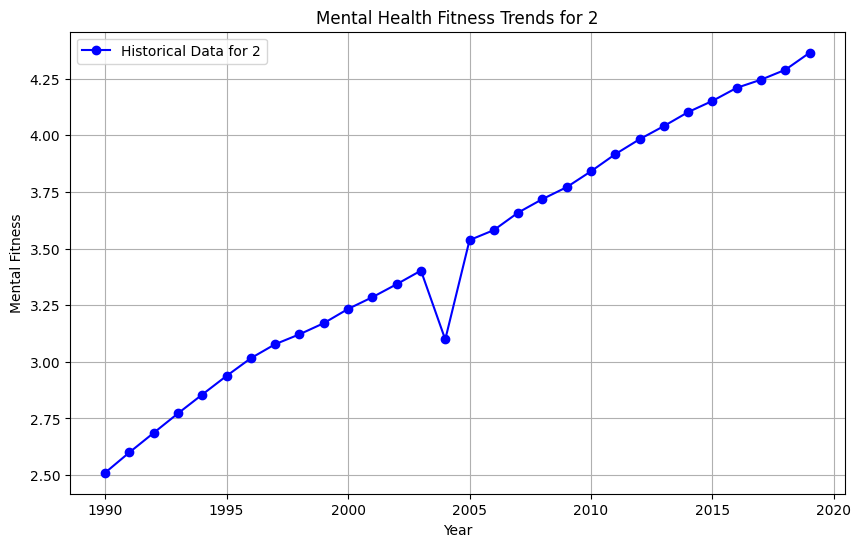

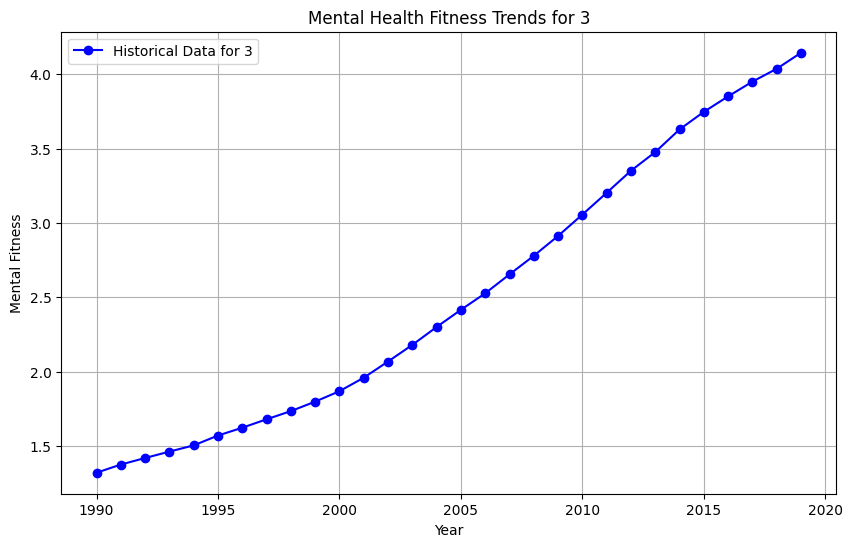

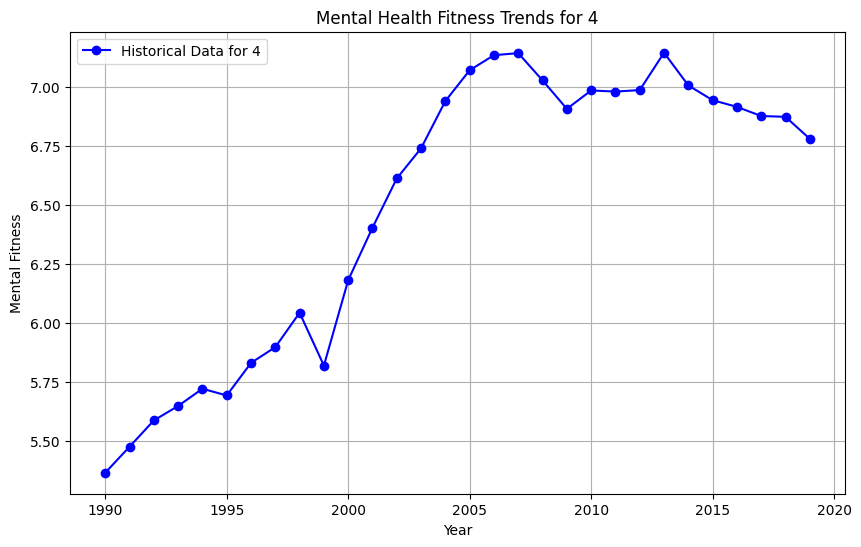

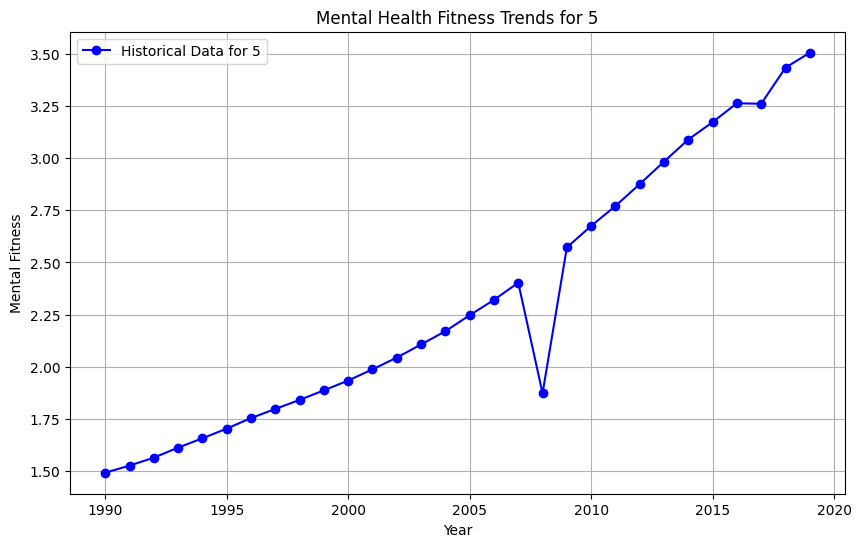

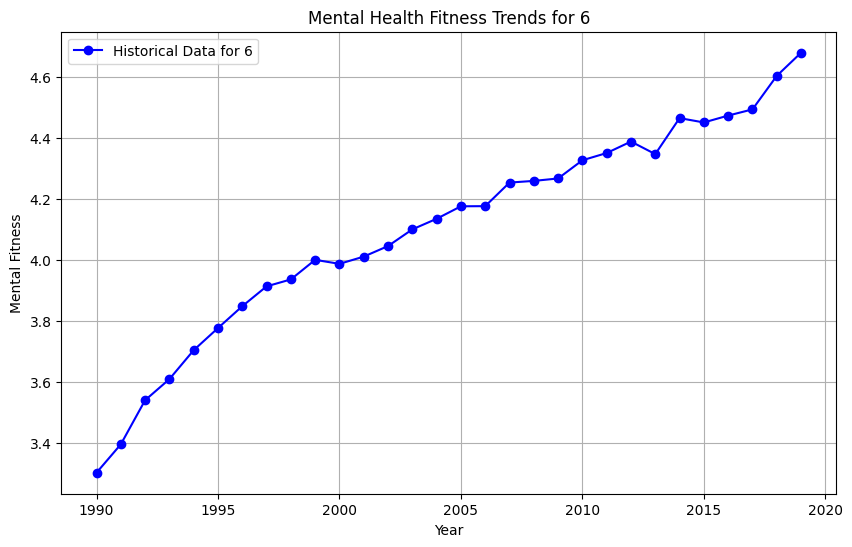

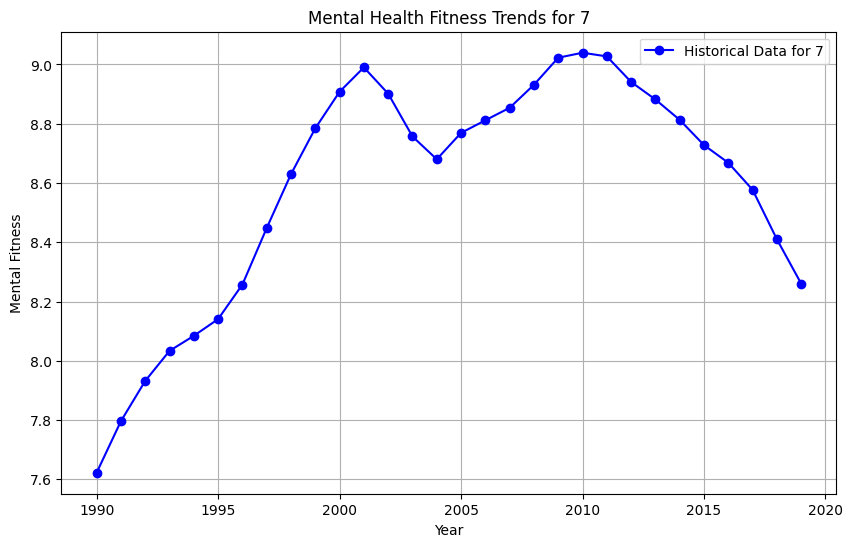

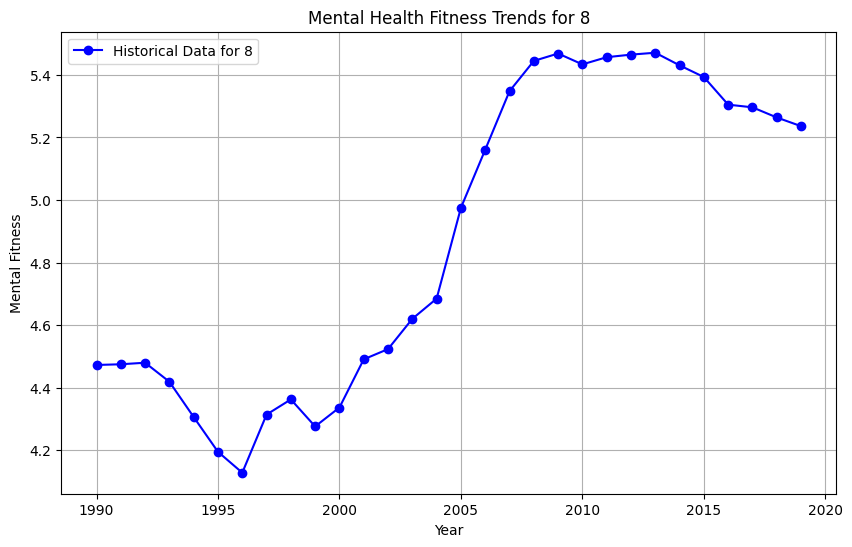

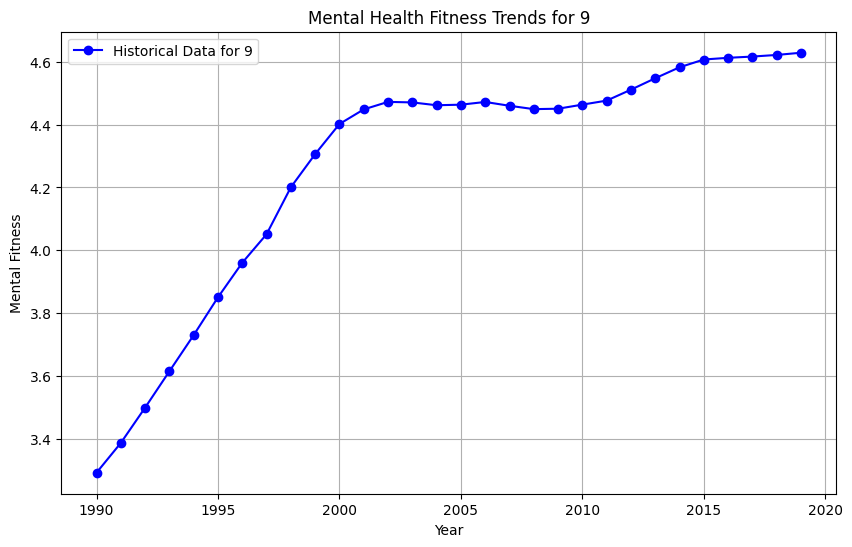

In [ ]:
countries = data['Country'].unique()

for country in countries:
    country_data = data[data['Country'] == country]

    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Mental_fitness'], label=f'Historical Data for {country}', marker='o', color='blue')
    plt.title(f'Mental Health Fitness Trends for {country}')
    plt.xlabel('Year')
    plt.ylabel('Mental Fitness')
    plt.legend()
    plt.grid(True)
    plt.show()


# Model Training - Regression

In [ ]:
df = data.copy()

In [ ]:
df.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
810,Brunei,1990,0.326822,0.624113,0.473302,3.028683,0.881231,1.701147,1.023002,5.176148
811,Brunei,1991,0.327218,0.624707,0.469201,3.034194,0.881121,1.686907,1.012354,5.247895
812,Brunei,1992,0.327466,0.625318,0.465697,3.040504,0.879943,1.675388,1.002128,5.345016
813,Brunei,1993,0.327573,0.625979,0.462812,3.047317,0.878088,1.666598,0.992623,5.451285
814,Brunei,1994,0.327532,0.626602,0.460417,3.053681,0.877361,1.659791,0.984393,5.592965


In [ ]:
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])

In [ ]:
X = df.drop('Mental_fitness',axis=1)
y = df['Mental_fitness']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

# Model Testing

In [ ]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# model evaluation for training set
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.0028102656554224383
RMSE is 0.05301193880082522
R2 score is 0.9992816751714083


The model performance for testing set
--------------------------------------
MSE is 0.02459672759767874
RMSE is 0.15683343902904998
R2 score is 0.9937450789642617


# Evaluation

In [ ]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    y_train_pred = model.predict(x_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Testing predictions and metrics
    y_test_pred = model.predict(x_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Performance matrix
    performance = pd.DataFrame({
        'Dataset': ['Training', 'Testing'],
        'MSE': [mse_train, mse_test],
        'RMSE': [rmse_train, rmse_test],
        'MAE': [mae_train, mae_test],
        'R² Score': [r2_train, r2_test]
    })

    return performance, y_test_pred

performance_matrix, y_test_pred = evaluate_model(rf, xtrain, ytrain, xtest, ytest)

print("Performance Matrix:")
print(performance_matrix)

Performance Matrix:
    Dataset       MSE      RMSE       MAE  R² Score
0  Training  0.002810  0.053012  0.032629  0.999282
1   Testing  0.024597  0.156833  0.104859  0.993745


# Feature importance


Feature Importances:
            Feature  Importance
4   Eating_disorder    0.684659
3  Bipolar_disorder    0.129311
2     Schizophrenia    0.115960
8           Alcohol    0.024857
5           Anxiety    0.024060
1              Year    0.009870
7        Depression    0.006256
6        Drug_usage    0.003785
0           Country    0.001241


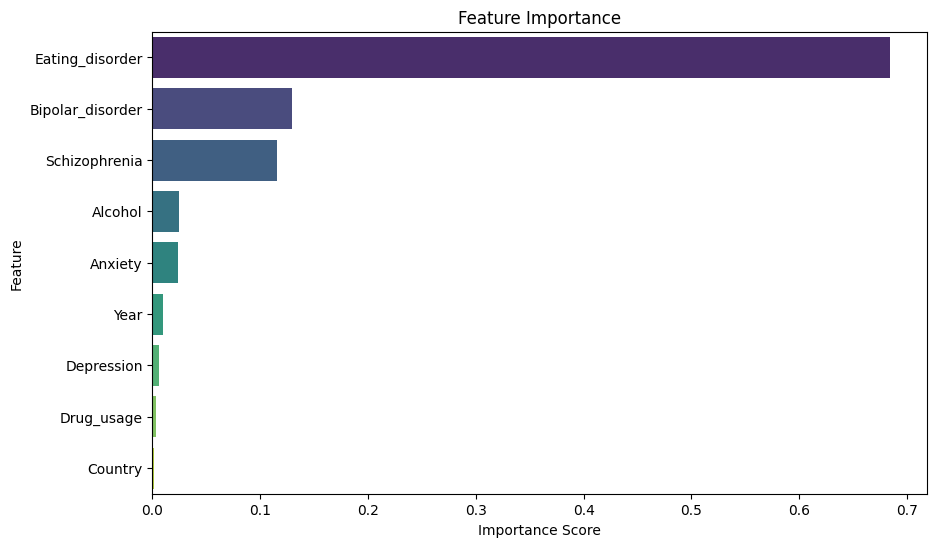

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': xtrain.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()